# Data Science Challenge - Data Exploration

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Load data
dfC = pd.read_csv('dataset/clients.csv', index_col=0)
dfE = pd.read_csv('dataset/editors.csv', index_col=0)
dfTa = pd.read_csv('dataset/tasks.csv', index_col=0)
dfTi = pd.read_csv('dataset/tickets.csv', index_col=0)

In [34]:
# Fix error with duplicated column name
dfTi = dfTi.rename(columns={'client_id':'unknown'})
dfTi = dfTi.rename(columns={'client_id.1':'client_id'})

In [35]:
# Plotting parameters
domains = ['travel', 'fintech', 'ecommerce', 'sports', 'gamming', 'health_care']
colors = {
    'travel': 'C0',
    'fintech': 'C2',
    'ecommerce': 'C7',
    'sports': 'C1',
    'gamming': 'C4',
    'health_care': 'C3'
}

In [36]:
# Max / Mean / SD
dfE['max'] = dfE[domains].max(axis='columns')
dfE['mean'] = dfE[domains].mean(axis='columns')
dfE['std'] = dfE[domains].std(axis='columns')

# View Data

In [37]:
print("Clients")
display(dfC.head())
print("Editors")
display(dfE.head())
print("Tasks")
display(dfTa.head())
print("Tickets")
display(dfTi.head())

Clients


,id,domain,category
226,8171ce8697ccbc42991a2eca38cbdee8f96fd794701aa1...,ecommerce,Medium
292,203f6f43688c9abe2e66df55828826f1e04815fa1bf289...,ecommerce,Small
90,896eaafb9691dd3992336145e0b80bb71fdcded7fca603...,health_care,Enterprise
373,84506a2e169143888f4e1c7afe5bc52699ca5cf1b6cc2e...,fintech,Enterprise
273,19388f0b6133ef2085e26dfc50b046836f9aada571cbd8...,fintech,Enterprise


Editors


,id,travel,fintech,ecommerce,sports,gamming,health_care,max,mean,std
0,dd2a4a379c04b944834c66cc797815f0f6b01c10858e8b...,2,4,4,2,5,3,5,3.333333,1.211060
2,2f5da6e9921baa794759ee9f4b362555bcb3c1646eb51f...,3,3,4,5,3,5,5,3.833333,0.983192
5,534599df3b467cfe814e0a4a979cc9726b64d189247e92...,4,3,1,2,1,4,4,2.500000,1.378405
6,2f8308ae8b2b2f57f17d96c86457b4f219242999399697...,3,2,5,5,3,1,5,3.166667,1.602082
18,9865f5293dce01180593e9329dff57a1ac9a41d33afef7...,3,2,4,4,4,5,5,3.666667,1.032796


Tasks


,id,number_words,sequence_number,ticket_id
0,L139WPBDIEJG4PD2FOAWDMGC0XLFVEJO,40,1,C05739545
1,QKADER8M3USE69QGU1DPZRVAUZX8WDJI,40,2,C05739545
2,7FA5ED3SSU5QC2TNBX1Y3TOZDDVJ60ZY,40,3,C05739545
3,AUGNZGL3HUUKQICO2URO4VBA6TJPC1SI,22,4,C05739545
4,D3DUPMUSC7ZOX9DD3G8NP2CPUWNRH835,40,1,C05739547


Tickets


,id,unknown,number_words,tone,language_pair,quality_score,price,client_id
0,C05739545,87.0,142,informal,pt_en,-1,-1,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...
2,C05739547,32.0,172,formal,pt_en,-1,-1,a59b8fa90a633fd2902283bfbe4dffa9c06e3420c03df5...
3,C05739550,32.0,344,informal,pt_en,-1,-1,36b322832c268a1fa9e64b30dc6490c6591d4b38ae28d2...
4,C05739554,80.0,1436,informal,fr_de,-1,-1,89225a3eb6c39c319e0175a029402b7d07bfba033fdba2...
5,C05739559,80.0,163,informal,pt_en,-1,-1,896eaafb9691dd3992336145e0b80bb71fdcded7fca603...


In [38]:
dfTa.loc[dfTa['ticket_id']=='C05739545']

,id,number_words,sequence_number,ticket_id
0,L139WPBDIEJG4PD2FOAWDMGC0XLFVEJO,40,1,C05739545
1,QKADER8M3USE69QGU1DPZRVAUZX8WDJI,40,2,C05739545
2,7FA5ED3SSU5QC2TNBX1Y3TOZDDVJ60ZY,40,3,C05739545
3,AUGNZGL3HUUKQICO2URO4VBA6TJPC1SI,22,4,C05739545


## Average Translator Skill

In [39]:
n_editors = len(dfE)
n_editors_leq_2 = len(dfE.loc[dfE['max']<=2])
pct_editors_leq_2 = n_editors_leq_2 / n_editors
n_editors_eq_3 = len(dfE.loc[dfE['max']==3])
pct_editors_eq_3 = n_editors_eq_3 / n_editors
n_editors_geq_4 = len(dfE.loc[dfE['max']>=4])
pct_editors_geq_4 = n_editors_geq_4 / n_editors
print("Number of Translators: {n:,d}".format(n=n_editors))
print("Low skill translators (max skill <= 2): {n:d} ({pct:.2%})".format(n=n_editors_leq_2, pct=pct_editors_leq_2))
print("Median skill translators (max skill == 3): {n:d} ({pct:.2%})".format(n=n_editors_eq_3, pct=pct_editors_eq_3))
print("High skill translators (max skill >= 3): {n:d} ({pct:.2%})".format(n=n_editors_geq_4, pct=pct_editors_geq_4))


Number of Translators: 418
Low skill translators (max skill <= 2): 3 (0.72%)
Median skill translators (max skill == 3): 23 (5.50%)
High skill translators (max skill >= 3): 392 (93.78%)


## Translator skills
Visualizing post editor skills accross different topics

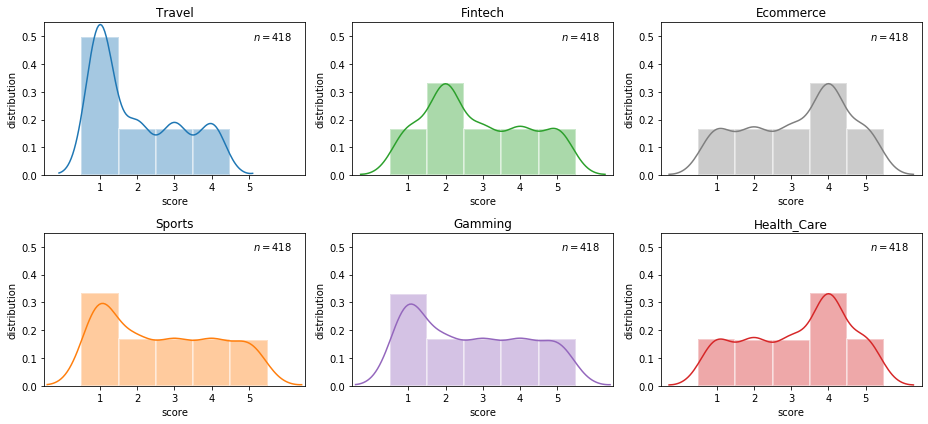

In [40]:
fig, (axes) = plt.subplots(nrows=2, ncols=3, figsize=(13,6))
for ax, domain in zip(axes.flatten(), domains):
    d = dfE[domain]
    n = dfE[domain].count()
    color = colors[domain]
    sns.distplot(d, color=color, ax=ax, bins=np.arange(1,7)-0.5, hist_kws={'linewidth': 2, 'edgecolor':'white'})
    ax.set_title(domain.title())
    ax.set_xticks(np.arange(1,6))
    ax.set_xlim(-0.5,6.5)
    ax.set_ylim(0,0.55)
    ax.set_ylabel('distribution')
    ax.set_xlabel('score')
    ax.text(x=0.95, y=0.95, s=r'$n={:d}$'.format(n), va='top', ha='right', transform=ax.transAxes)
plt.tight_layout()

## Transposing translator skills
Visualizing post editor skills that are low in a specific domain, in other domains

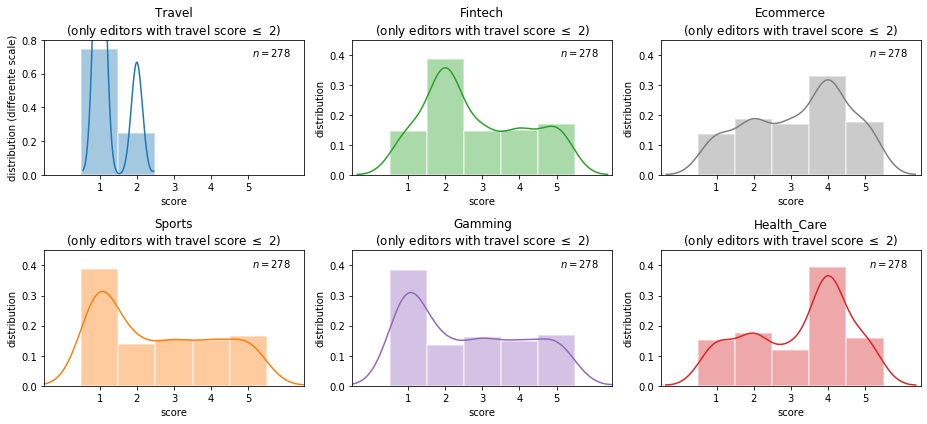

In [41]:
# Inspect the low skill editors in travel across the other domains.
dfE_travel = dfE.loc[dfE['travel']<=2,:]
fig, (axes) = plt.subplots(nrows=2, ncols=3, figsize=(13,6))
for ax, domain in zip(axes.flatten(), domains):
    d = dfE_travel[domain]
    n = dfE_travel[domain].count()
    color = colors[domain]
    sns.distplot(d, color=color, ax=ax, bins=np.arange(1,7)-0.5, hist_kws={'linewidth': 2, 'edgecolor':'white'})
    ax.set_title("{:s}\n(only editors with travel score $\leq$ 2)".format(domain.title()))
    ax.set_xticks(np.arange(1,6))
    ax.set_xlim(-0.5,6.5)
    ax.set_ylim(0,0.45)
    ax.set_ylabel('distribution')
    ax.set_xlabel('score')
    ax.text(x=0.95, y=0.95, s=r'$n={:d}$'.format(n), va='top', ha='right', transform=ax.transAxes)
    if domain == 'travel':
        ax.set_ylabel('distribution (differente scale)')
        ax.set_ylim(0,0.8)
plt.tight_layout()
fig.savefig('images/transferable-skills.pdf')

## Number of words per ticket
Visualizing the number of words from tickets across different topics

In [42]:
# Left Join (Clients on Tickets)
dfTiC = dfTi.set_index('client_id').join(dfC.set_index('id'))

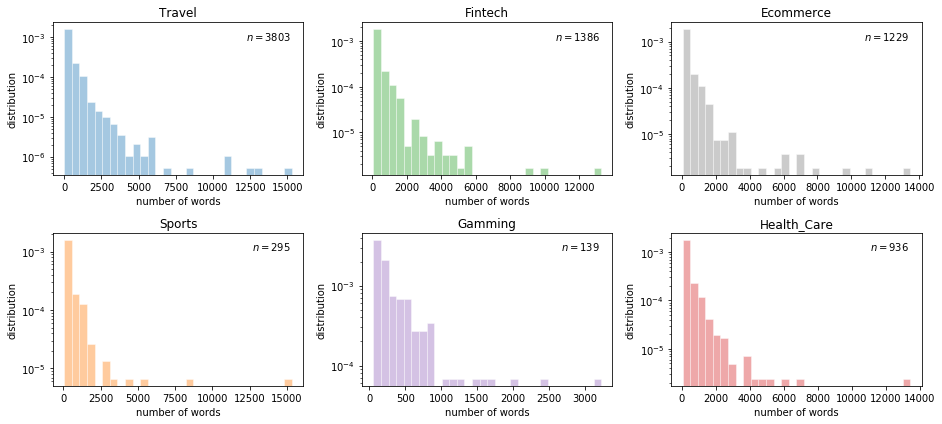

In [43]:
fig, (axes) = plt.subplots(nrows=2, ncols=3, figsize=(13,6))
for ax, domain in zip(axes.flatten(), domains):
    dftmp = dfTiC.loc[(dfTiC['domain'] == domain), :].reset_index()
    d = dftmp['number_words']
    n = dftmp['number_words'].count()
    color = colors[domain]
    sns.distplot(d, color=color, ax=ax, bins=30, kde=False, hist=True, norm_hist=True, hist_kws={'linewidth': 1, 'edgecolor':'white'})
    ax.set_title(domain.title())
    ax.set_ylabel('distribution')
    ax.set_xlabel('number of words')
    ax.set_yscale('log')
    ax.text(x=0.95, y=0.95, s=r'$n={:d}$'.format(n), va='top', ha='right', transform=ax.transAxes)
    #break
plt.tight_layout()

## Number of words per task
Visualizing the number of words from tasks across different topics

In [44]:
dfTi

,id,unknown,number_words,tone,language_pair,quality_score,price,client_id
0,C05739545,87.0,142,informal,pt_en,-1,-1,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...
2,C05739547,32.0,172,formal,pt_en,-1,-1,a59b8fa90a633fd2902283bfbe4dffa9c06e3420c03df5...
3,C05739550,32.0,344,informal,pt_en,-1,-1,36b322832c268a1fa9e64b30dc6490c6591d4b38ae28d2...
4,C05739554,80.0,1436,informal,fr_de,-1,-1,89225a3eb6c39c319e0175a029402b7d07bfba033fdba2...
5,C05739559,80.0,163,informal,pt_en,-1,-1,896eaafb9691dd3992336145e0b80bb71fdcded7fca603...
...,...,...,...,...,...,...,...,...
7940,C05778462,180.0,364,informal,pt_en,-1,-1,08790ec4a07f4ea4f0aca6da75882c7bb044c29fe642b0...
7941,C05778463,180.0,138,formal,fr_de,-1,-1,36b322832c268a1fa9e64b30dc6490c6591d4b38ae28d2...
7942,C05778465,116.0,1288,informal,es_ja,-1,-1,72d26122e4aef9be62176640b5f185009fa0b9fb94cb77...
7943,C05778466,143.0,125,formal,pt_en,-1,-1,df809fcbd44f05b842f1c80d98119a0b3d6f7cd51b611d...


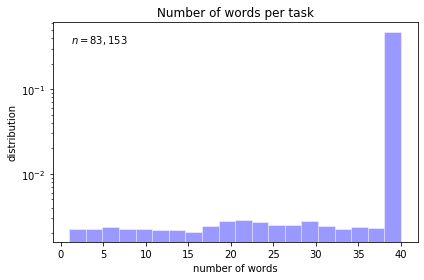

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
dftmp = dfTa
d = dfTa['number_words']
n = dfTa['number_words'].count()
sns.distplot(d, color='blue', ax=ax, bins=20, kde=False, hist=True, norm_hist=True, hist_kws={'linewidth': 1, 'edgecolor':'white'})
ax.set_title('Number of words per task')
ax.set_ylabel('distribution')
ax.set_xlabel('number of words')
ax.set_yscale('log')
ax.text(x=0.05, y=0.95, s=r'$n={:,d}$'.format(n), va='top', ha='left', transform=ax.transAxes)
#break
plt.tight_layout()

## Language Pairs
Visualizing distribution of language pairs of tickets

Issue: there is no such data for editors. It's not possible to direct match editors to language pairs.

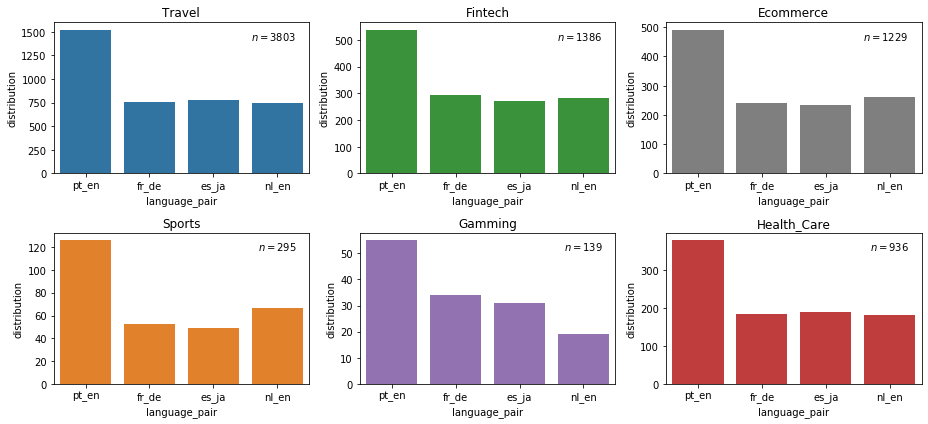

In [46]:
fig, (axes) = plt.subplots(nrows=2, ncols=3, figsize=(13,6))
for ax, domain in zip(axes.flatten(), domains):
    dftmp = dfTiC.loc[(dfTiC['domain'] == domain), :].reset_index()
    n = dftmp['language_pair'].count()
    color = colors[domain]
    order = ['pt_en', 'fr_de', 'es_ja', 'nl_en']
    sns.countplot(x='language_pair', order=order, color=color, ax=ax, data=dftmp,)
    ax.set_title(domain.title())
    ax.set_ylabel('distribution')
    ax.set_xlabel('language_pair')
    #ax.set_yscale('log')
    ax.text(x=0.95, y=0.95, s=r'$n={:d}$'.format(n), va='top', ha='right', transform=ax.transAxes)
    #break
plt.tight_layout()